# Lean Six Sigma
## Author: Snigdhayan Mahanta

`Lean Six Sigma` is a well established process improvement methodology. Consider a company that manufactures several products at various locations and it is interested in improving the quality (e.g., reducing the number of defects in the manufactured products). There are several `Lean Six Sigma` tools that it can use to visualize and control the process. I created a curated dataset for this purpose and illustrated some of the tools below.

In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create curated manufacting data
n_types = 3 # number of distinct product types
n_obs = 1000 # total number of observations

# Type of the product per observation
productType <- round(sample(1:n_types, n_obs, replace = TRUE))
productType <- paste("P", productType, sep="")

# Number of defects per observation
defects <- round(abs(rnorm(n_obs, mean = 800, sd = 500)))

# Quantity of the product per observation
quantity <- 1000*defects + round(abs(rnorm(n_obs, mean = 50000, sd = 100000)))

# Manufacturing location per observation
location <- sample(c("Germany", "France", "Spain", "Italy"), n_obs, replace = TRUE, prob = c(0.3, 0.4, 0.2, 0.1))

# Dataframe of manufacturing data
df <- data.frame("ProductType" = productType, "Quantity" = quantity, "Defects" = defects, "Location" = location)

# Ratio of defects to quantity
df <- within(df, DefectRatio <- df$Defects/df$Quantity)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,ProductType,Quantity,Defects,Location,DefectRatio
,<fct>,<dbl>,<dbl>,<fct>,<dbl>
401,P1,769954,743,Germany,0.0009649927
169,P1,1312439,1187,Spain,0.0009044230
974,P1,513014,454,Germany,0.0008849661
431,P1,726900,543,Germany,0.0007470078
254,P1,1053882,992,Germany,0.0009412819
580,P1,1556455,1483,Germany,0.0009528062
511,P1,597511,492,France,0.0008234158
558,P3,694449,596,Germany,0.0008582344
795,P2,769638,731,France,0.0009497972


         
Pareto chart analysis for ratio
             Frequency    Cum.Freq.   Percentage Cum.Percent.
  Spain   9.003322e-04 9.003322e-04 2.577567e+01 2.577567e+01
  Italy   8.797264e-04 1.780059e-03 2.518574e+01 5.096141e+01
  France  8.669077e-04 2.646966e-03 2.481875e+01 7.578017e+01
  Germany 8.459876e-04 3.492954e-03 2.421983e+01 1.000000e+02

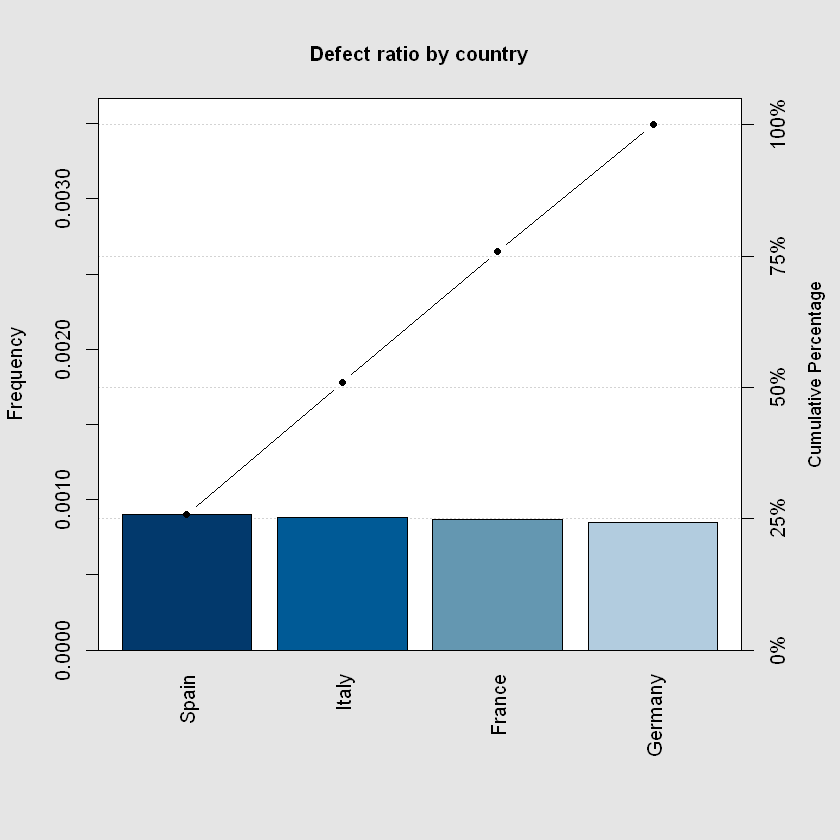

In [4]:
# Pareto chart
aggregatedData <- aggregate(myData$DefectRatio, by=list(Location=myData$Location), FUN=mean)
names(aggregatedData)[2] <- "DefectRatio"
ratio <- aggregatedData$DefectRatio
names(ratio) <- aggregatedData$Location
pareto.chart(ratio, main="Defect ratio by country")

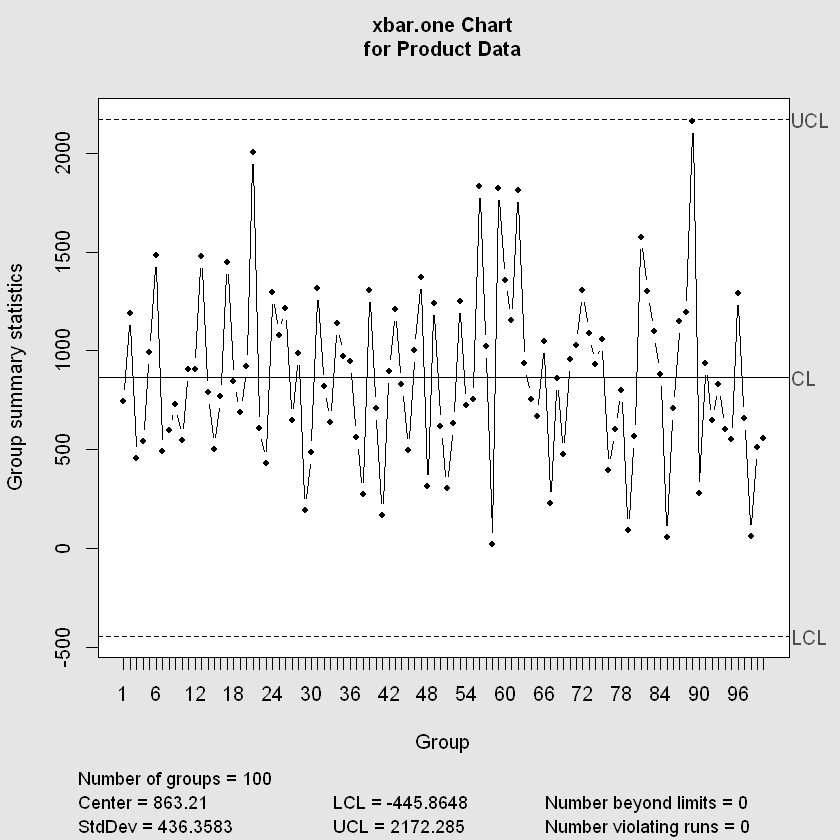

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$Defects, data.name="Product Data", type="xbar.one", nsigmas=3)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(200, 600),     breaks = 20)

Number of obs = 100          Target = 400
       Center = 863.2           LSL = 200
       StdDev = 436.4           USL = 600

Capability indices:

        Value      2.5%    97.5%
Cp     0.1528   0.13152   0.1740
Cp_l   0.5066   0.42592   0.5873
Cp_u  -0.2011  -0.14141  -0.2607
Cp_k  -0.2011  -0.12998  -0.2721
Cpm    0.1048   0.08683   0.1227

Exp<LSL 6.4%	 Obs<LSL 6%
Exp>USL 73%	 Obs>USL 73%


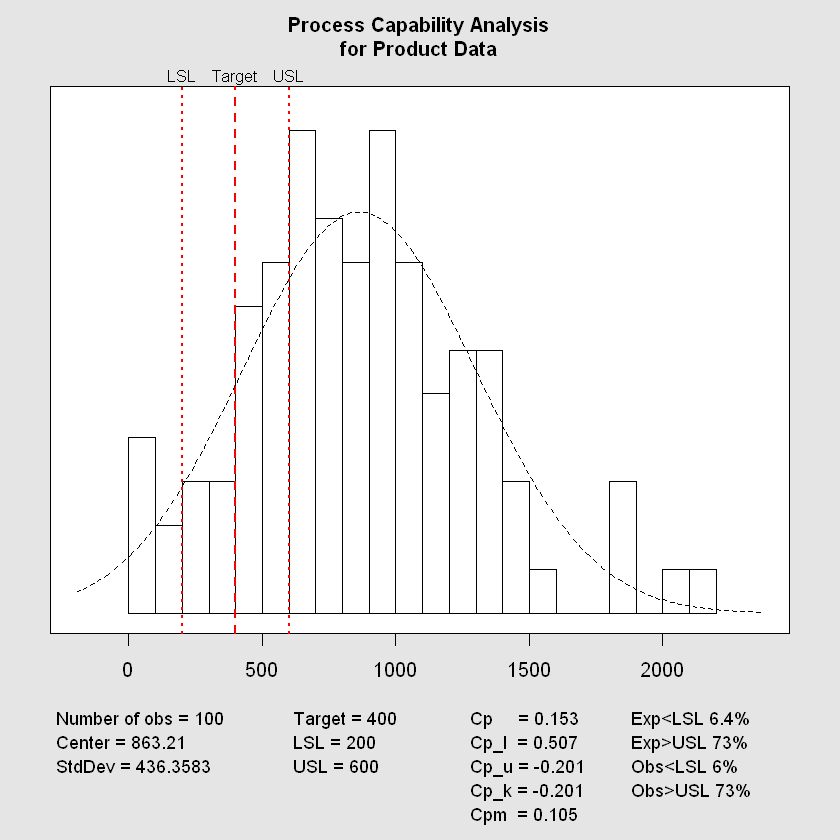

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(200, 600), breaks=20,)

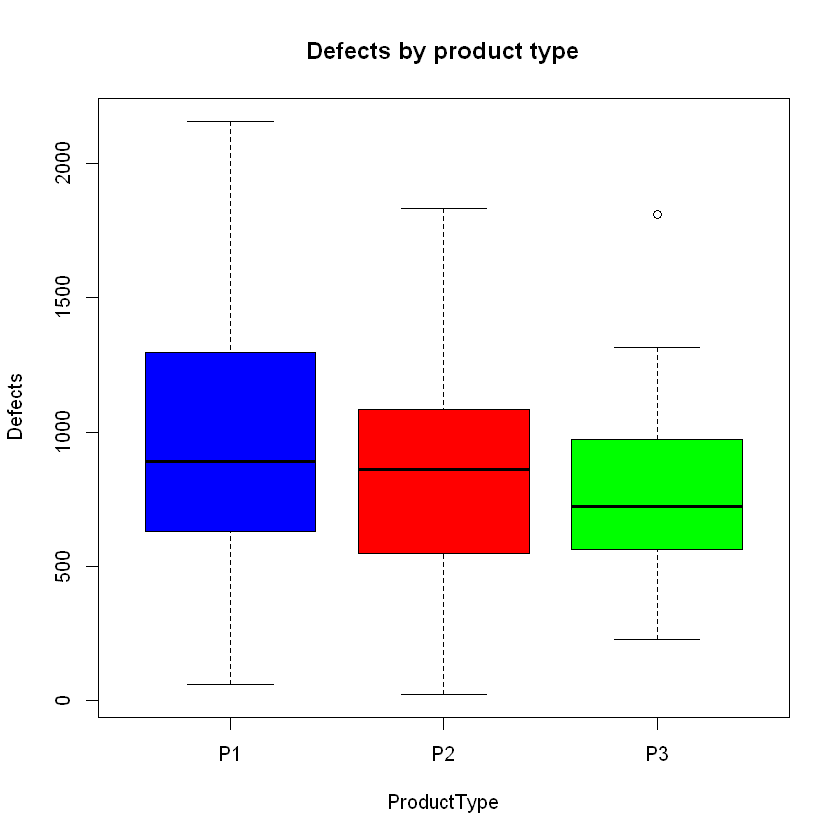

In [7]:
# Boxplot of defects by product type
boxplot(data=myData, Defects ~ ProductType, 
        col = c("blue", "red", "green"),
        ylab = "Defects",
        main = "Defects by product type")

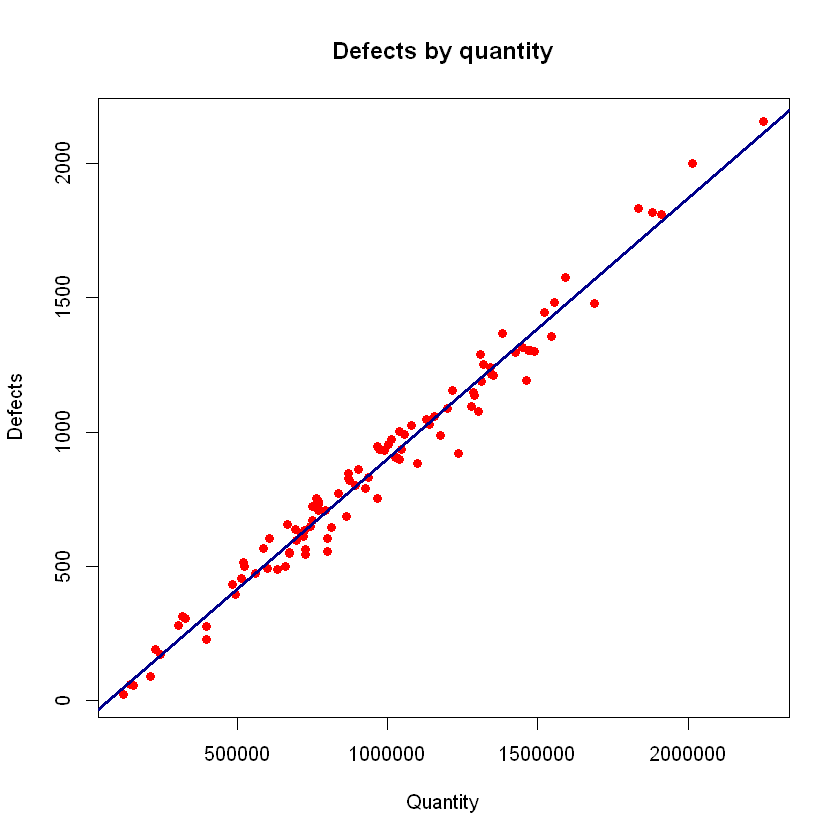

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantity",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

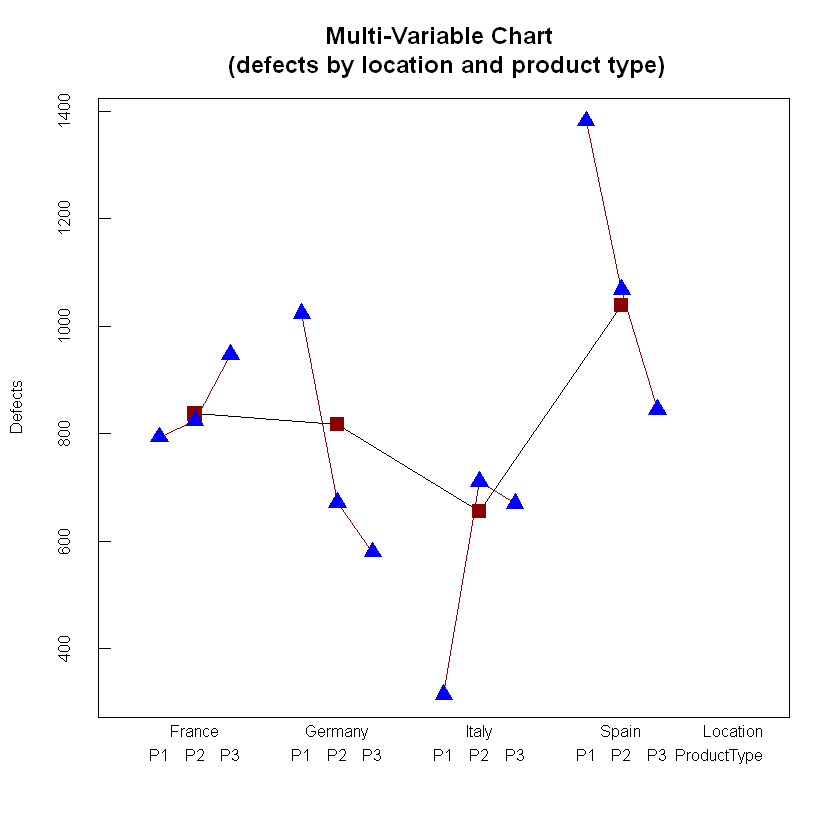

In [9]:
# Multivari chart of defects by location and product type
multivari("Defects",                          # Response 
          "Location", "ProductType",            # Factors  
          data = myData,                      # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 2,
          legend = FALSE,
          cex = 0.8,
          main = "Multi-Variable Chart \n (defects by location and product type)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Location, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Location     3  1143817  381272   2.129  0.102
Residuals   96 17192616  179090               

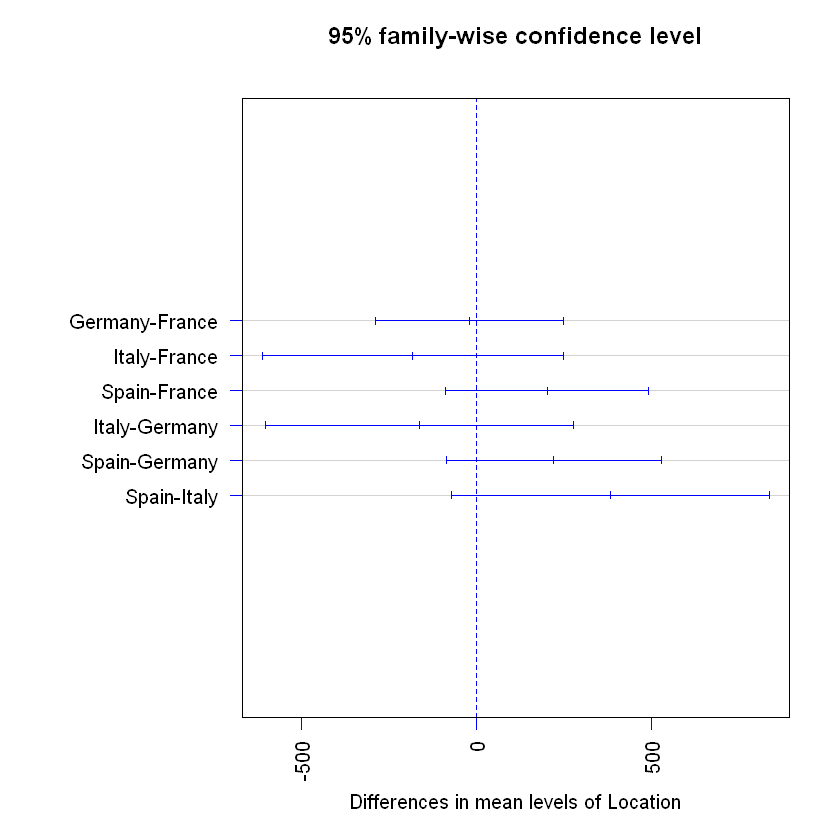

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest